In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from snowflakeManager import SnowflakeManager

In [4]:
sm = SnowflakeManager()

In [5]:
df = sm.fetch_selling_data()

In [6]:
df.shape

(9271036, 20)

In [9]:
df.head(5)

,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
0,782344,55750557.0,Pessoa Física,F,1980-11-18,10085918,VONAU FLASH 4MG 10CP,MEDICAMENTOS,REFERENCIA,764,RS,80400,PORTO ALEGRE,2024-04-11 17:13:25,1.0,NaN,47.03,12.70,47.03,34.33
1,759507,55750557.0,Pessoa Física,F,1980-11-18,10106687,APTANUTRI PREMIUM 3,NUTRICAO,NUTRICAO LEITES,764,RS,80400,PORTO ALEGRE,2024-02-19 15:47:17,1.0,NaN,73.99,14.80,73.99,59.19
2,742082,55750557.0,Pessoa Física,F,1980-11-18,10037705,TORRADA ISABELA 142G TRADICIONAL,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-01-05 19:48:52,1.0,NaN,5.99,0.00,5.99,5.99
3,747733,55750557.0,Pessoa Física,F,1980-11-18,10004419,OZEMPIC 1MG 4AGULHAS NOVOFINE,MEDICAMENTOS,PBM ESPECIAL,764,RS,80400,PORTO ALEGRE,2024-01-20 14:41:56,1.0,NaN,1220.52,254.37,1220.52,966.15
4,748216,55750557.0,Pessoa Física,F,1980-11-18,10030435,NOVALGINA 1G 20CP OPELLA,MEDICAMENTOS,REFERENCIA ONEROSOS,764,RS,80400,PORTO ALEGRE,2024-01-22 16:48:36,1.0,100271131.0,41.51,5.52,41.51,35.99


In [7]:
df.isnull().sum()

COD_CUPOM                          0
COD_CLIENTE                      178
CLIENTE_FISICO_JURIDICO        10051
SEXO_CLIENTE                  103541
DTNASCIMENTO_CLIENTE         1078012
COD_SKU                            0
SKU                                0
CATEGORIA_SKU                      0
SUBCATEGORIA_SKU                   0
COD_LOJA                           0
UF_CIDADE                          0
COD_CIDADE                         0
NOME_CIDADE                        0
DATA_CUPOM                         0
UNIDADES                           0
IDENTIFICADOR_PROMOCIONAL    6735816
PRECO_REGULAR                      0
TOTAL_DESCONTO                    73
TOTAL_BRUTO                        0
TOTAL_LIQUIDO                      0
dtype: int64

# Data Dict

In [8]:
print(sm.run_query("SELECT GET_DDL('TABLE', 'PUC_VENDAS');")[0][0])

create or replace dynamic table PUC_VENDAS(
	COD_CUPOM COMMENT 'Código do cupom de venda',
	COD_CLIENTE COMMENT 'Identificador do cadastro do cliente, cada cliente possui um código único',
	CLIENTE_FISICO_JURIDICO COMMENT 'Identificador de se o cliente se trata de uma pessoa física ou jurídica.',
	SEXO_CLIENTE COMMENT 'Identificador do sexo do cliente. M=Masculino, F=Feminino, null=Pessoa jurídica e/ou não informado',
	DTNASCIMENTO_CLIENTE COMMENT 'Data de nascimento do cliente',
	COD_SKU COMMENT 'Código de produto interno da São João para identificar o produto da venda',
	SKU COMMENT 'Descrição do produto',
	CATEGORIA_SKU COMMENT 'Descrição da categoria do produto, internamente conhecido como grupo de produto.',
	SUBCATEGORIA_SKU COMMENT 'Descrição da subcategoria do produto, internamente conhecido como subgrupo de produto.',
	COD_LOJA COMMENT 'Identificador da loja da São João onde ocorreu a venda.',
	UF_CIDADE COMMENT 'Identificador da UF onde ocorreu a venda.',
	COD_CIDADE COMMENT 

# Observing Duplicate Rows: Does this indicate multiple purchases by the same customer in one transaction or a data entry error?

In [10]:
df[df.duplicated(keep=False)]

,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
13,776686,55750557.0,Pessoa Física,F,1980-11-18,10037216,CHOCO NEUGEBAUER AMENDOIM 80G,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-03-30 13:28:13.000,1.0,100301594.0,6.99,3.66,6.99,3.33
34,773314,55750557.0,Pessoa Física,F,1980-11-18,10091659,AMOX+CL POT 250MG 75,MEDICAMENTOS,ANTIBIOTICO CONT. GENERICO SUPER ONEROSO,764,RS,80400,PORTO ALEGRE,2024-03-22 12:35:39.000,1.0,NaN,73.16,10.97,73.16,62.19
36,764169,55750557.0,Pessoa Física,F,1980-11-18,10020551,TWIX ORIGINAL 4,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-03-01 18:27:02.000,1.0,NaN,3.79,0.00,3.79,3.79
64,776686,55750557.0,Pessoa Física,F,1980-11-18,10037216,CHOCO NEUGEBAUER AMENDOIM 80G,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-03-30 13:28:13.000,1.0,100301594.0,6.99,3.66,6.99,3.33
81,761104,55750557.0,Pessoa Física,F,1980-11-18,10035372,ESCITALOPRAM 10MG 30CP REV GEN CIMED (C1,MEDICAMENTOS,GENERICO CONTROLADO,764,RS,80400,PORTO ALEGRE,2024-02-22 17:30:22.000,1.0,NaN,29.90,4.49,29.90,25.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9270798,257888,55717970.0,Pessoa Física,M,1981-01-19,10035292,SAB ALBANY 85G LIMPEZA PROFUNDA,PERFUMARIA,PERFUMARIA,1076,RS,80400,PORTO ALEGRE,2024-06-23 09:59:38.125,1.0,100283029.0,1.99,0.50,1.99,1.49
9270808,173900,55730236.0,Pessoa Física,M,2003-06-21,10008493,CERA DEP NEEZ DEPIL,PERFUMARIA,PERFUMARIA,1184,RS,80400,PORTO ALEGRE,2024-01-09 16:16:30.000,1.0,NaN,10.99,0.00,10.99,10.99
9270811,173900,55730236.0,Pessoa Física,M,2003-06-21,10008493,CERA DEP NEEZ DEPIL,PERFUMARIA,PERFUMARIA,1184,RS,80400,PORTO ALEGRE,2024-01-09 16:16:30.000,1.0,NaN,10.99,0.00,10.99,10.99
9270964,229774,55747470.0,Pessoa Física,F,2000-08-30,10035291,SAB ALBANY 85G OLEO DE MACADAMIA,PERFUMARIA,PERFUMARIA,932,RS,80400,PORTO ALEGRE,2024-06-16 18:16:40.848,1.0,100283029.0,1.99,0.50,1.99,1.49


---

- **UF_CIDADE**: The column contains a constant value `"RS"` across all entries.
- **COD_CIDADE**: This column consistently holds the value `"80400"`.
- **NOME_CIDADE**: Every entry in this column is `"PORTO ALEGRE"`.
- **SEXO_CLIENTE**: This column has `103,541` missing values, accounting for `1.1%` of the total data. 4839845 are M and 4327650 are F. 
- **IDENTIFICADOR_PROMOCIONAL**: A significant portion of this column is missing, with `6,735,816` missing values, representing `72.7%` of the data.
- **COD_CLIENTE**: has 1042842 products registered to COD_CLIENTE=0.
- *DTNASCIMENTO_CLIENTE:  1111-11-11 -> 59 values | 1598-01-20 -> 2 values | 1198-04-17 -> 2 values
- *SKU: There are 984 itens that were sold only once.
- *CLIENTE_FISICO_JURIDICO: Vast amount of "Pessoa Física". It was expected. null=Pessoa jurídica e/ou não informado
- *UNIDADES*: temos vendas que tiveram quantidades enormes de produtos vendidos. por exemplo -> 3000 absorventes, porém a grande maioria foi durante o período das enchentes
---


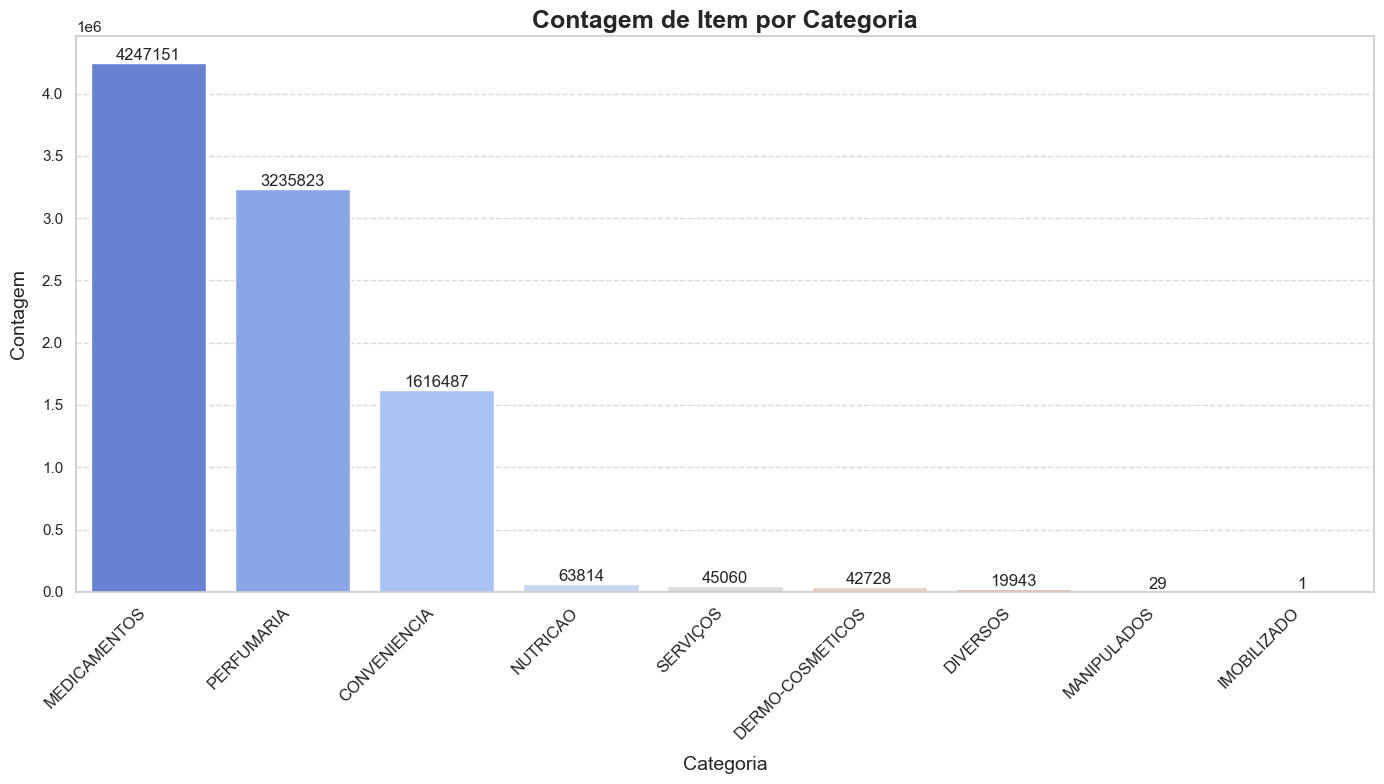

In [49]:
cat_sku_count = df['CATEGORIA_SKU'].value_counts()

plt.figure(figsize=(14, 8))

sns.barplot(x=cat_sku_count.index, y=cat_sku_count.values, hue=cat_sku_count.index, palette='coolwarm')

plt.title('Contagem de Item por Categoria', fontsize=18, weight='bold')
plt.xlabel('Categoria', fontsize=14, labelpad=10)
plt.ylabel('Contagem', fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(cat_sku_count.values):
    plt.text(index, value + 1, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Biggest units sales

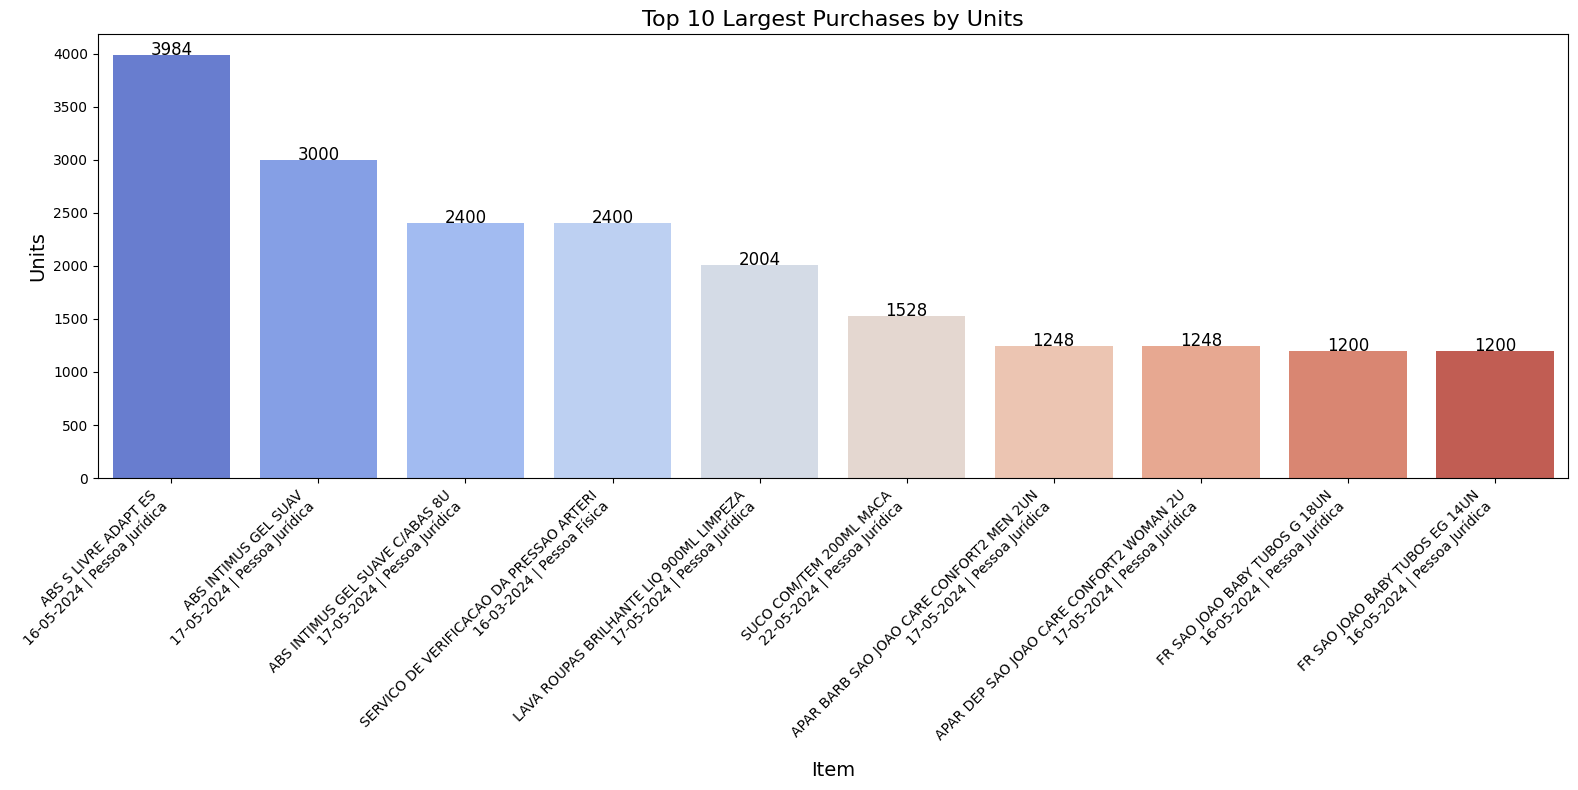

In [14]:
top_10_units = df.nlargest(10, 'UNIDADES')

top_10_units['Date'] = pd.to_datetime(top_10_units['DATA_CUPOM']).dt.strftime('%d-%m-%Y')
top_10_units['Item_Label'] = top_10_units['SKU'] + '\n' + top_10_units['Date'] + ' | ' + top_10_units['CLIENTE_FISICO_JURIDICO']

plt.figure(figsize=(16, 8))
sns.barplot(x='Item_Label', y='UNIDADES', data=top_10_units, hue='Item_Label', palette='coolwarm')

plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_10_units['UNIDADES']):
    plt.text(index, value + 0.5, f'{value:.0f}', ha='center', fontsize=12)

plt.title('Top 10 Largest Purchases by Units', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Units', fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()


## The majority of these sales occured during the floods in May

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17224\3923779128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UNIDADES', y='Item_Label', data=top_10_units_flood, palette='viridis')


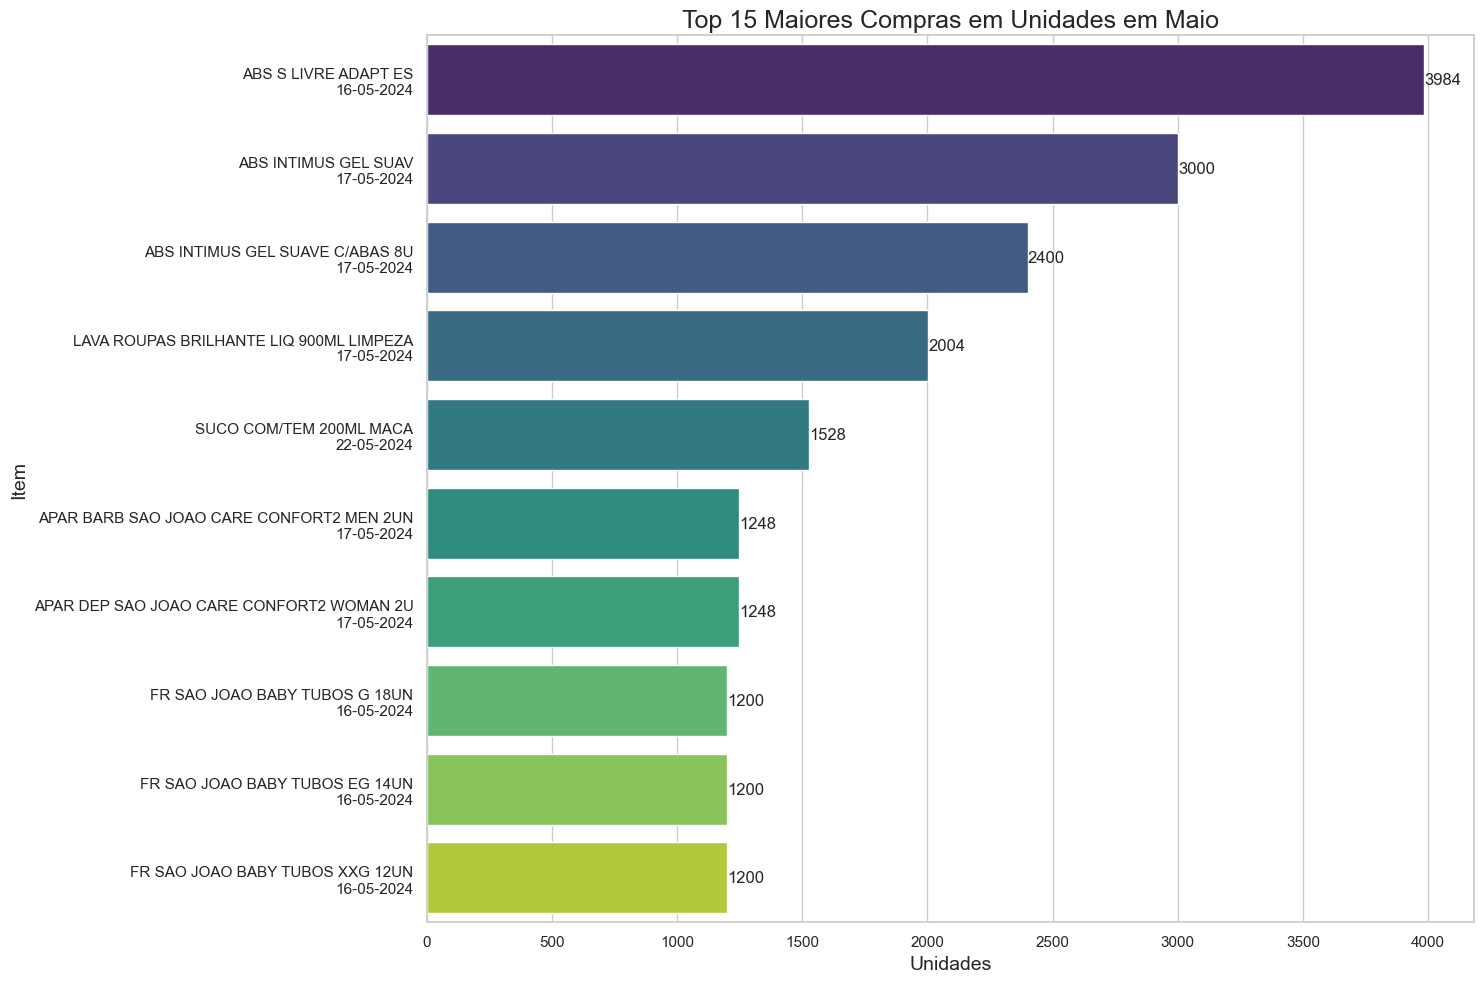

In [48]:
top_10_units_flood = df[df['DATA_CUPOM'].dt.month == 5].nlargest(10, 'UNIDADES')

top_10_units_flood['Date'] = pd.to_datetime(top_10_units_flood['DATA_CUPOM']).dt.strftime('%d-%m-%Y')
top_10_units_flood['Item_Label'] = top_10_units_flood['SKU'] + '\n' + top_10_units_flood['Date'] 

plt.figure(figsize=(15, 10))
sns.barplot(x='UNIDADES', y='Item_Label', data=top_10_units_flood, palette='viridis')

for index, value in enumerate(top_10_units_flood['UNIDADES']):
    plt.text(value + 0.5, index, f'{value:.0f}', va='center', fontsize=12)

plt.title('Top 15 Maiores Compras em Unidades em Maio', fontsize=18)
plt.xlabel('Unidades', fontsize=14)
plt.ylabel('Item', fontsize=14)


plt.tight_layout()
plt.show()

# Net Total Over the Days During the Months

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17224\2249617740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Day'] = df_time['DATA_CUPOM'].dt.day
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17224\2249617740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Month'] = df_time["DATA_CUPOM"].dt.month
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17224\2249617740.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


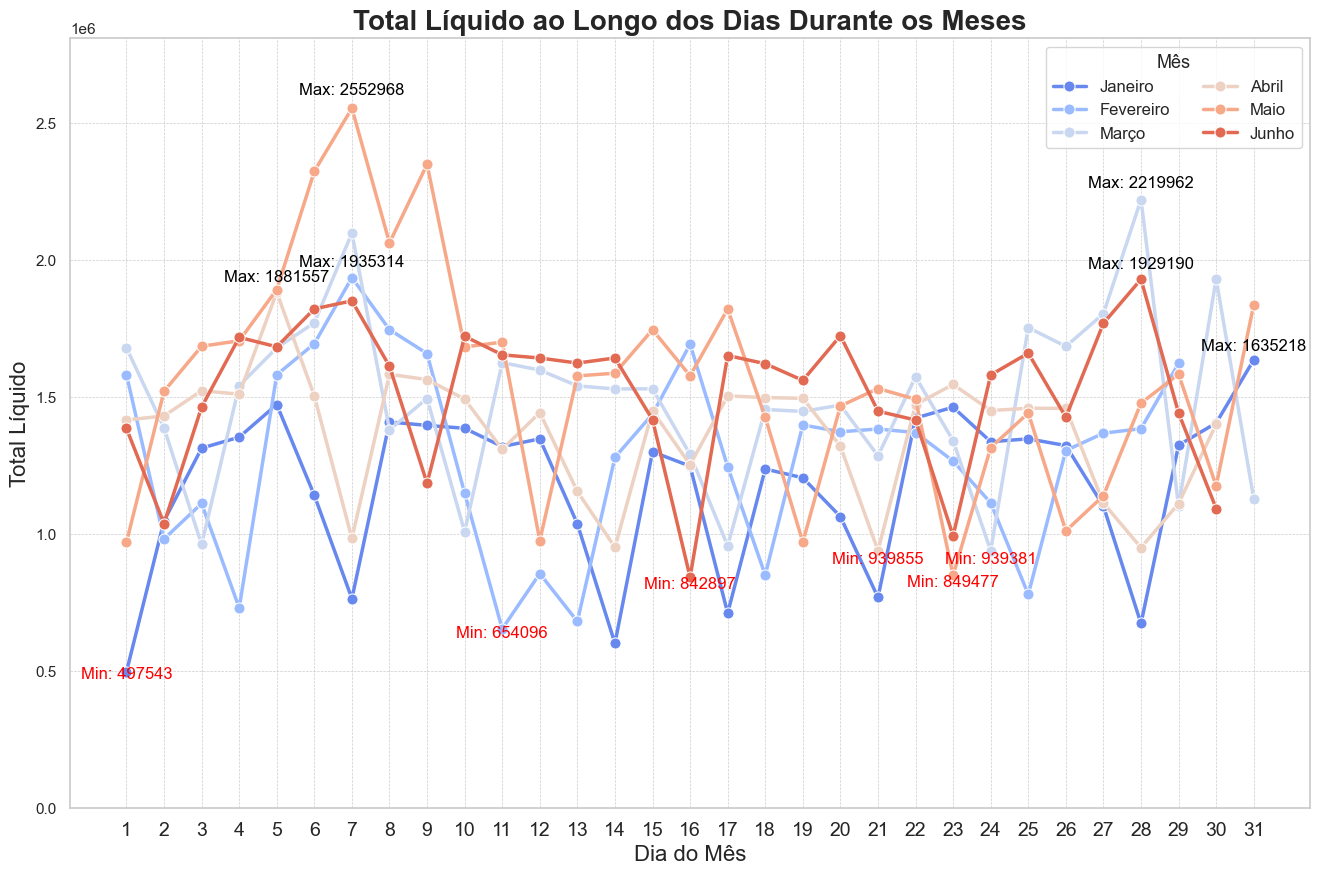

In [47]:
df_time = df[['DATA_CUPOM', 'TOTAL_LIQUIDO']]
df_time['Day'] = df_time['DATA_CUPOM'].dt.day
df_time['Month'] = df_time["DATA_CUPOM"].dt.month

df_agg = df_time.groupby(['Month', 'Day'])['TOTAL_LIQUIDO'].sum().reset_index()

month_names = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
               7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
df_agg['Month'] = df_agg['Month'].map(month_names)

sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

palette = sns.color_palette("coolwarm", len(df_agg['Month'].unique()))

sns.lineplot(
    x='Day', 
    y='TOTAL_LIQUIDO', 
    hue='Month', 
    data=df_agg, 
    palette=palette, 
    marker='o', 
    linewidth=2.5,
    markersize=8,
    ci=None
)

for month in df_agg['Month'].unique():
    month_data = df_agg[df_agg['Month'] == month]
    max_day = month_data.loc[month_data['TOTAL_LIQUIDO'].idxmax()]
    min_day = month_data.loc[month_data['TOTAL_LIQUIDO'].idxmin()]
    
    plt.text(max_day['Day'], max_day['TOTAL_LIQUIDO'] + 0.02 * max_day['TOTAL_LIQUIDO'], 
             f"Max: {max_day['TOTAL_LIQUIDO']:.0f}", 
             horizontalalignment='center', fontsize=12, color='black')
    
    plt.text(min_day['Day'], min_day['TOTAL_LIQUIDO'] - 0.05 * min_day['TOTAL_LIQUIDO'], 
             f"Min: {min_day['TOTAL_LIQUIDO']:.0f}", 
             horizontalalignment='center', fontsize=12, color='red')

plt.title('Total Líquido ao Longo dos Dias Durante os Meses', fontsize=20, fontweight='bold')
plt.xlabel('Dia do Mês', fontsize=16)
plt.ylabel('Total Líquido', fontsize=16)
plt.xticks(fontsize=14)

plt.xticks(ticks=range(1, 32), labels=range(1, 32), rotation=0)

plt.legend(title='Mês', title_fontsize='13', fontsize='12', loc='upper right', ncol=2)

plt.ylim(0, df_agg['TOTAL_LIQUIDO'].max() * 1.1)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

# Awkward dates

In [ ]:
def is_out_of_bounds(date_str):
    try:
        year = int(str(date_str).split('-')[0])
        if year < 1900 or year > datetime.now().year:
            return True
    except (ValueError, TypeError):
        return True

In [61]:
out_of_bounds = df.loc[
    pd.to_datetime(df['DTNASCIMENTO_CLIENTE'], errors='coerce').isna() | 
    df['DTNASCIMENTO_CLIENTE'].apply(is_out_of_bounds)
]

unique_out_of_bounds = set(out_of_bounds['DTNASCIMENTO_CLIENTE'].dropna().apply(lambda x: x.strftime('%Y-%m-%d')))
formatted_dates = ', '.join(sorted(unique_out_of_bounds))

print(f"Unique out-of-bounds dates: {formatted_dates}")

Unique out of bounds dates: {datetime.date(1898, 1, 1), datetime.date(1889, 1, 1), datetime.date(1198, 4, 17), datetime.date(2045, 5, 4), datetime.date(1852, 5, 19), datetime.date(2046, 2, 20), datetime.date(1888, 12, 10), datetime.date(1848, 1, 1), datetime.date(2048, 6, 1), datetime.date(1888, 1, 1), datetime.date(1845, 5, 15), datetime.date(2048, 11, 30), datetime.date(1598, 1, 20), datetime.date(1899, 5, 12), None, datetime.date(1857, 6, 22), datetime.date(1899, 12, 12), datetime.date(2049, 9, 23), datetime.date(1891, 5, 14), datetime.date(2043, 8, 29), datetime.date(1111, 11, 11), datetime.date(1899, 1, 1), datetime.date(1870, 5, 16), datetime.date(1899, 3, 21), datetime.date(1887, 8, 7), datetime.date(2047, 12, 27)}


In [65]:
.

,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
910,285982,55721820.0,Pessoa Física,None,None,100001402,SERVICO DOMICILIO,DIVERSOS,SERVICOS TELE ENTREGA,682,RS,80400,PORTO ALEGRE,2024-04-18 16:38:51.000,1.0,NaN,8.99,0.00,8.99,8.99
911,285982,55721820.0,Pessoa Física,None,None,10006795,TADALAFILA 20MG 4CP,MEDICAMENTOS,GENERICOS,682,RS,80400,PORTO ALEGRE,2024-04-18 16:38:51.000,1.0,100317525.0,20.99,10.20,20.99,10.79
5703,385220,55839078.0,Pessoa Jurídica,None,None,14092,"FITA MICROPORE CREMER 5CMX4,5M BRANCA",MEDICAMENTOS,HOSPITALARES,845,RS,80400,PORTO ALEGRE,2024-02-27 10:56:21.000,1.0,NaN,19.90,0.00,19.90,19.90
5704,385220,55839078.0,Pessoa Jurídica,None,None,10106581,"FITA MICROPORE CREMER 2,5CMX4,5M BEG",MEDICAMENTOS,HOSPITALARES,845,RS,80400,PORTO ALEGRE,2024-02-27 10:56:21.000,1.0,NaN,11.99,0.00,11.99,11.99
5705,385220,55839078.0,Pessoa Jurídica,None,None,10106581,"FITA MICROPORE CREMER 2,5CMX4,5M BEG",MEDICAMENTOS,HOSPITALARES,845,RS,80400,PORTO ALEGRE,2024-02-27 10:56:21.000,1.0,NaN,11.99,0.00,11.99,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269386,24506,55730432.0,Pessoa Física,None,None,10035176,PROT LAB CARMED 10G DENTADURAS FINI,PERFUMARIA,PERFUMARIA,1347,RS,80400,PORTO ALEGRE,2024-02-27 10:38:39.000,1.0,NaN,29.90,0.00,29.90,29.90
9269387,24506,55730432.0,Pessoa Física,None,None,10036591,PROT LAB CARMED 10G MACA DO AMOR,PERFUMARIA,PERFUMARIA,1347,RS,80400,PORTO ALEGRE,2024-02-27 10:38:39.000,1.0,100294322.0,29.90,29.89,29.90,0.01
9270141,16957,55743838.0,Pessoa Física,None,None,10021214,AGUA MINERAL DA PEDRA C/GAS 500ML,CONVENIENCIA,BEBIDAS,130,RS,80400,PORTO ALEGRE,2024-06-14 15:51:10.529,1.0,100346471.0,4.49,1.20,4.49,3.29
9270142,21624,55743838.0,Pessoa Física,None,None,6833,SORINAN AD 30ML PHARMASCIENCE,MEDICAMENTOS,SIMILAR ONEROSO,130,RS,80400,PORTO ALEGRE,2024-06-26 15:50:33.880,1.0,NaN,8.49,0.00,8.49,8.49


In [64]:
df_valid_dates = df['DTNASCIMENTO_CLIENTE'].to_frame()
df_valid_dates['Validity'] = df_valid_dates['DTNASCIMENTO_CLIENTE'].apply(lambda x: 'Invalid' if is_out_of_bounds(x) else 'Valid')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df_valid_dates, x='DTNASCIMENTO_CLIENTE', hue='Validity', multiple='stack', palette={'Valid': 'blue', 'Invalid': 'red'})

plt.title('Distribution of Valid and Invalid Dates')
plt.xlabel('DTNASCIMENTO_CLIENTE')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 

In [55]:
a.DTNASCIMENTO_CLIENTE.value_counts()

DTNASCIMENTO_CLIENTE
1111-11-11    59
1598-01-20     2
1198-04-17     2
Name: count, dtype: int64

In [45]:
for x in a :
    try:
        if int(x) > 2025:
            print(x)
    except:
        pass

2048
2048
2048
2049
2049
2048
2048
2045
2045
2045
2045
2047
2047
2047
2046
2049
2049
2049
2049
2049
2049
2049
2049
2043


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271036 entries, 0 to 9271035
Data columns (total 20 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   COD_CUPOM                  int32         
 1   COD_CLIENTE                float64       
 2   CLIENTE_FISICO_JURIDICO    object        
 3   SEXO_CLIENTE               object        
 4   DTNASCIMENTO_CLIENTE       object        
 5   COD_SKU                    int32         
 6   SKU                        object        
 7   CATEGORIA_SKU              object        
 8   SUBCATEGORIA_SKU           object        
 9   COD_LOJA                   int16         
 10  UF_CIDADE                  object        
 11  COD_CIDADE                 int32         
 12  NOME_CIDADE                object        
 13  DATA_CUPOM                 datetime64[ns]
 14  UNIDADES                   float64       
 15  IDENTIFICADOR_PROMOCIONAL  float64       
 16  PRECO_REGULAR              float64  

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17224\820638645.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Usuario\anaconda3\envs\PCD2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


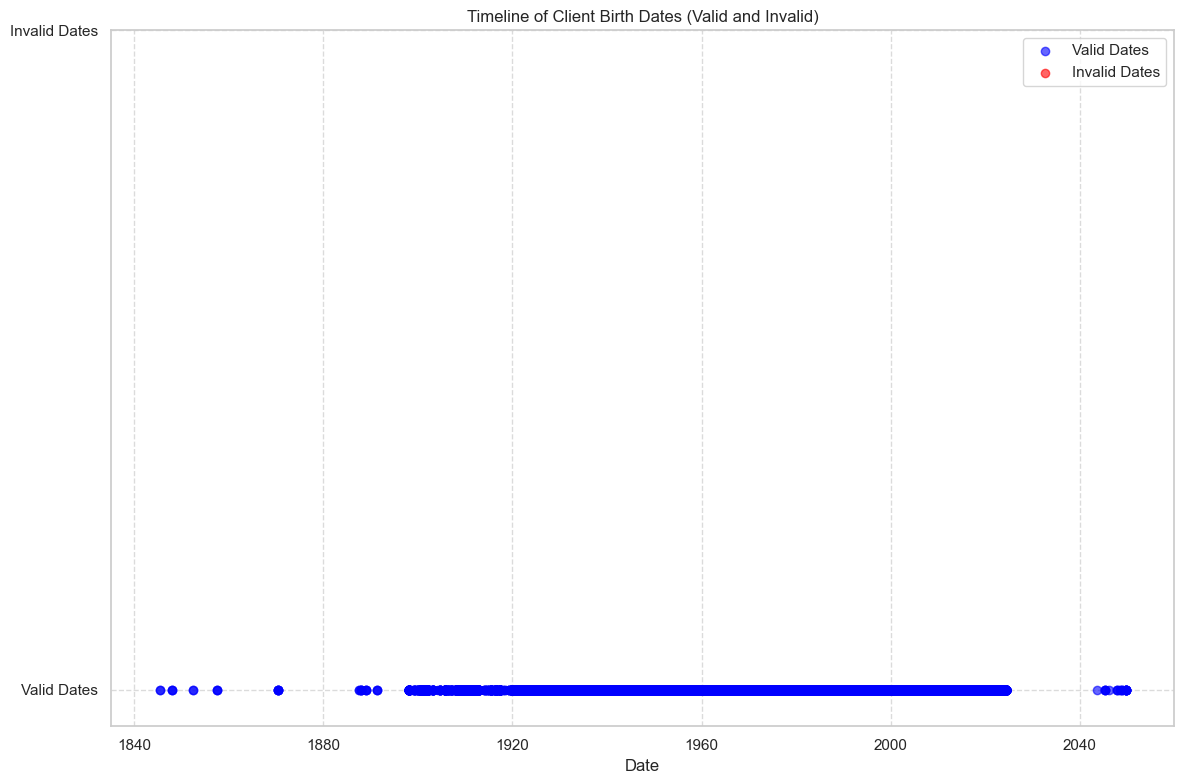

In [18]:
df_dates = df.copy()
df_dates['DTNASCIMENTO_CLIENTE_PARSED'] = pd.to_datetime(df_dates['DTNASCIMENTO_CLIENTE'], errors='coerce')

# Extract rows with invalid dates
out_of_bounds = df_dates.loc[df_dates['DTNASCIMENTO_CLIENTE_PARSED'].isna()]

# Extract rows with valid dates
valid_dates = df_dates.loc[~df_dates['DTNASCIMENTO_CLIENTE_PARSED'].isna()]

# Plot the timeline graph
plt.figure(figsize=(12, 8))

# Plot valid dates
plt.scatter(valid_dates['DTNASCIMENTO_CLIENTE_PARSED'], [1] * len(valid_dates), color='blue', label='Valid Dates', alpha=0.6)

# Plot invalid dates
plt.scatter(pd.to_datetime(out_of_bounds['DTNASCIMENTO_CLIENTE'], errors='coerce', format='%Y-%m-%d', exact=False), 
            [2] * len(out_of_bounds), color='red', label='Invalid Dates', alpha=0.6)

# Format the plot
plt.yticks([1, 2], ['Valid Dates', 'Invalid Dates'])
plt.xlabel('Date')
plt.title('Timeline of Client Birth Dates (Valid and Invalid)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Média de gasto por grupo

In [1]:
df_valid = df[pd.to_datetime(df['DTNASCIMENTO_CLIENTE'], errors='coerce').notna()].copy()

df_valid['Idade'] = 2024 - pd.to_datetime(df_valid['DTNASCIMENTO_CLIENTE']).dt.year

faixas_etarias = pd.cut(df_valid['Idade'], bins=[18, 25, 35, 45, 60, 100])
gastos_por_faixa_etaria = df_valid.groupby(faixas_etarias, observed=True).agg({
    'TOTAL_LIQUIDO': 'mean',
    'COD_CUPOM': 'count'
}).rename(columns={'TOTAL_LIQUIDO': 'Gasto_Medio_Por_Compra', 'COD_CUPOM': 'Total_Compras'})

rotulos_faixas_etarias = ['18-24', '25-34', '35-44', '45-59', '60+']

plt.figure(figsize=(10, 6))
sns.barplot(
    x=rotulos_faixas_etarias,
    y=gastos_por_faixa_etaria['Gasto_Medio_Por_Compra'],
    hue=rotulos_faixas_etarias,  
    palette='Blues_d',
    dodge=False
)
plt.legend([], [], frameon=False)  
plt.title('Gasto Médio por Faixa Etária', fontsize=16, pad=20)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Gasto Médio', fontsize=14)
plt.xticks(rotation=0)
plt.show()


NameError: name 'df' is not defined

# Best stores

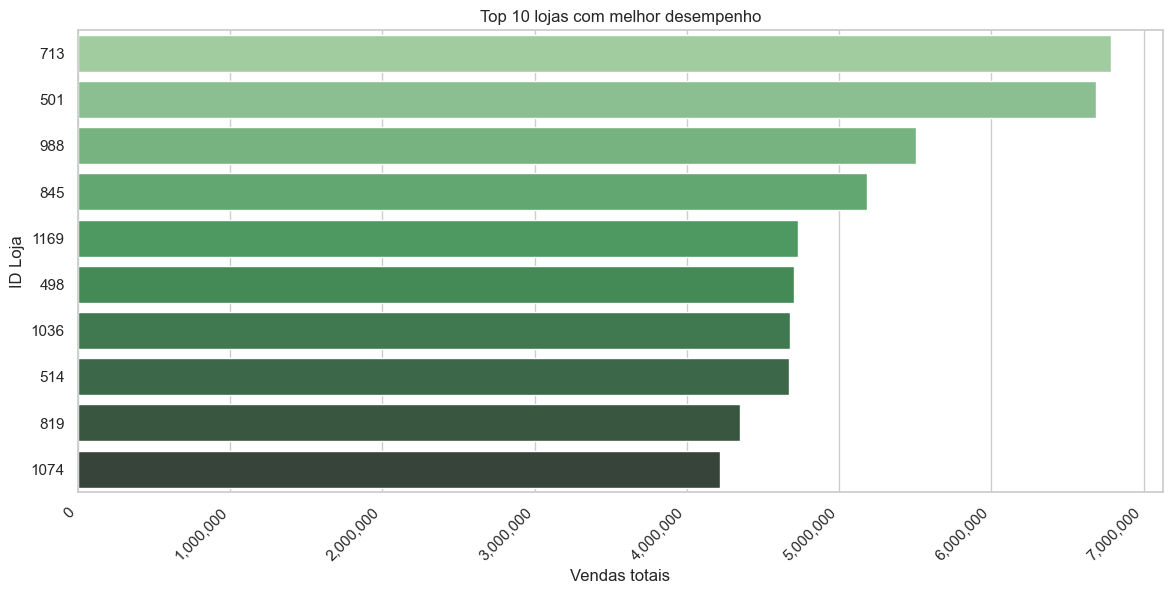

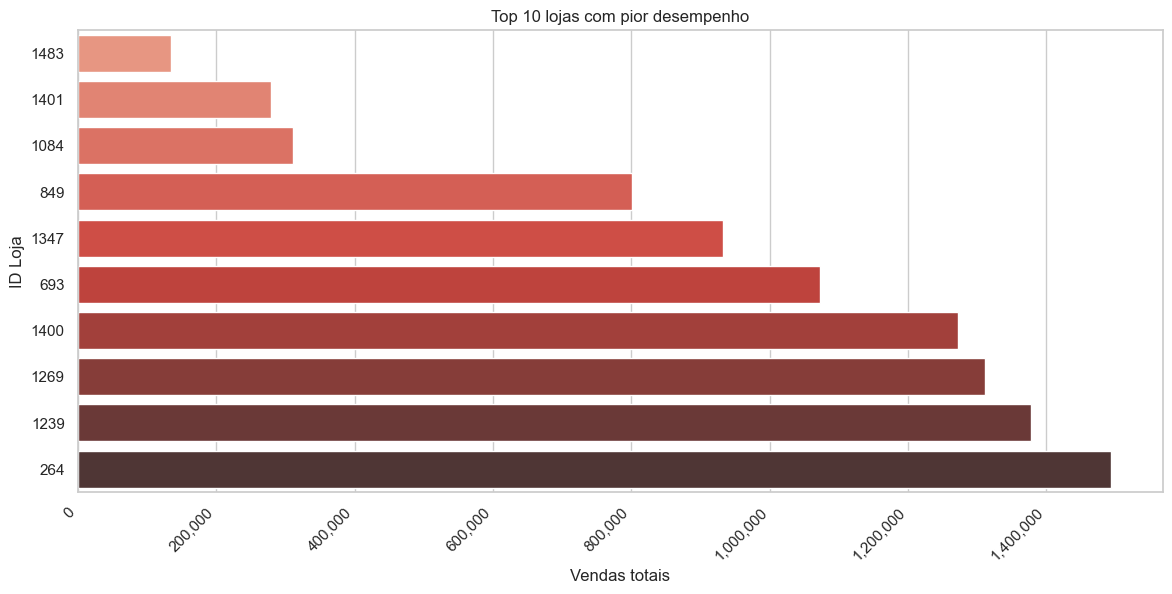

In [46]:
store_performance = df.groupby(['COD_LOJA']).agg({
    'TOTAL_LIQUIDO': 'sum',
    'COD_CUPOM': 'count'
}).rename(columns={'TOTAL_LIQUIDO': 'Total_Sales', 'COD_CUPOM': 'Number_of_Transactions'})


top_performing_stores = store_performance.sort_values(by='Total_Sales', ascending=False).head(10)
underperforming_stores = store_performance.sort_values(by='Total_Sales').head(10)

plt.figure(figsize=(14, 6))
sns.barplot(
    x=top_performing_stores['Total_Sales'],
    y=top_performing_stores.index.astype(str),
    hue=top_performing_stores.index.astype(str),  
    palette='Greens_d',
    dodge=False
)
plt.xlabel('Vendas totais')
plt.ylabel('ID Loja')
plt.title('Top 10 lojas com melhor desempenho')
plt.legend([], [], frameon=False)  
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}')) 
plt.show()


plt.figure(figsize=(14, 6))
sns.barplot(
    x=underperforming_stores['Total_Sales'],
    y=underperforming_stores.index.astype(str),
    hue=underperforming_stores.index.astype(str),  
    palette='Reds_d',
    dodge=False
)
plt.xlabel('Vendas totais')
plt.ylabel('ID Loja')
plt.title('Top 10 lojas com pior desempenho')
plt.legend([], [], frameon=False)  
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}')) 
plt.show()

# Sales from Hour and Day 

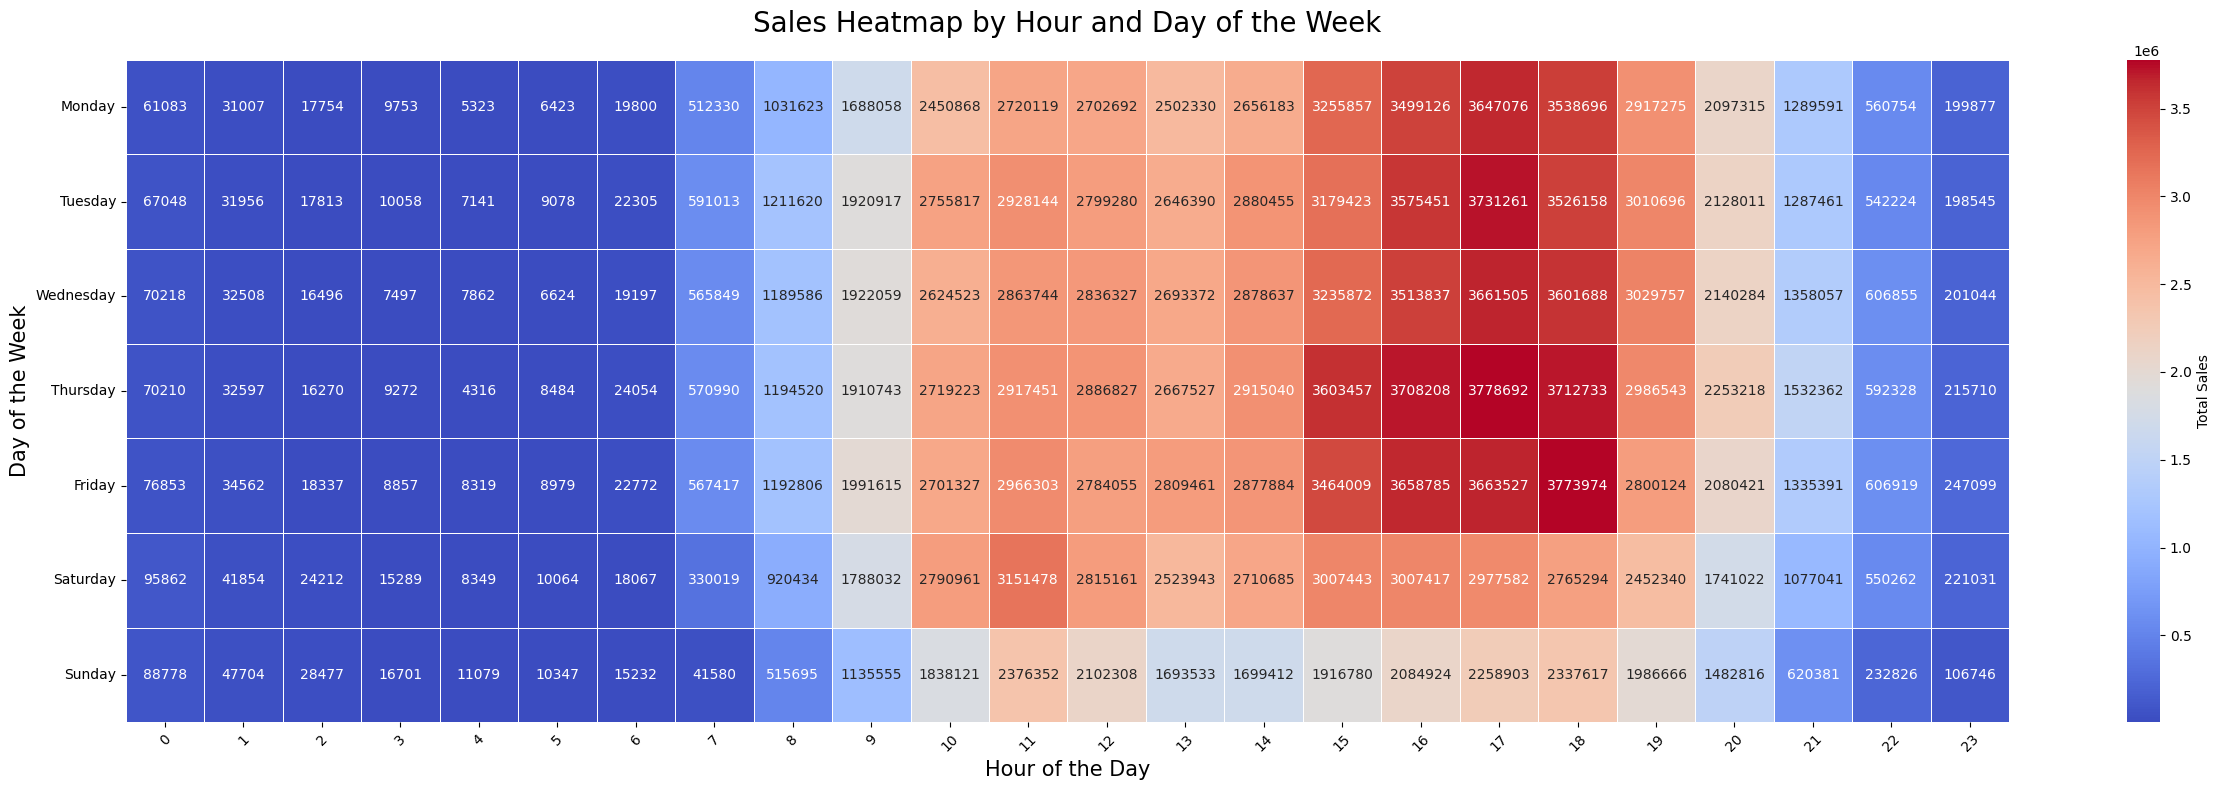

In [83]:
# 2. Peak Sales Times
# Extracting hour and day of the week from 'DATA_CUPOM'
df_peak_sales = df.copy()
df_peak_sales['Hour'] = df['DATA_CUPOM'].dt.hour
df_peak_sales['Day_of_Week'] = df['DATA_CUPOM'].dt.day_name()

# Group by hour and day of the week to find peak times
peak_sales_times = df_peak_sales.groupby(['Day_of_Week', 'Hour']).agg({
    'TOTAL_LIQUIDO': 'sum'
}).rename(columns={'TOTAL_LIQUIDO': 'Total_Sales'}).reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
peak_sales_pivot = peak_sales_times.pivot(index='Day_of_Week', columns='Hour', values='Total_Sales')
peak_sales_pivot = peak_sales_pivot.reindex(days_order)

# Plotting heatmap of peak sales times
plt.figure(figsize=(25, 8))
sns.heatmap(peak_sales_pivot, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Total Sales'})
plt.title('Sales Heatmap by Hour and Day of the Week', fontsize=20, pad=20)
plt.xlabel('Hour of the Day', fontsize=15)
plt.ylabel('Day of the Week', fontsize=15)
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top Items Sold

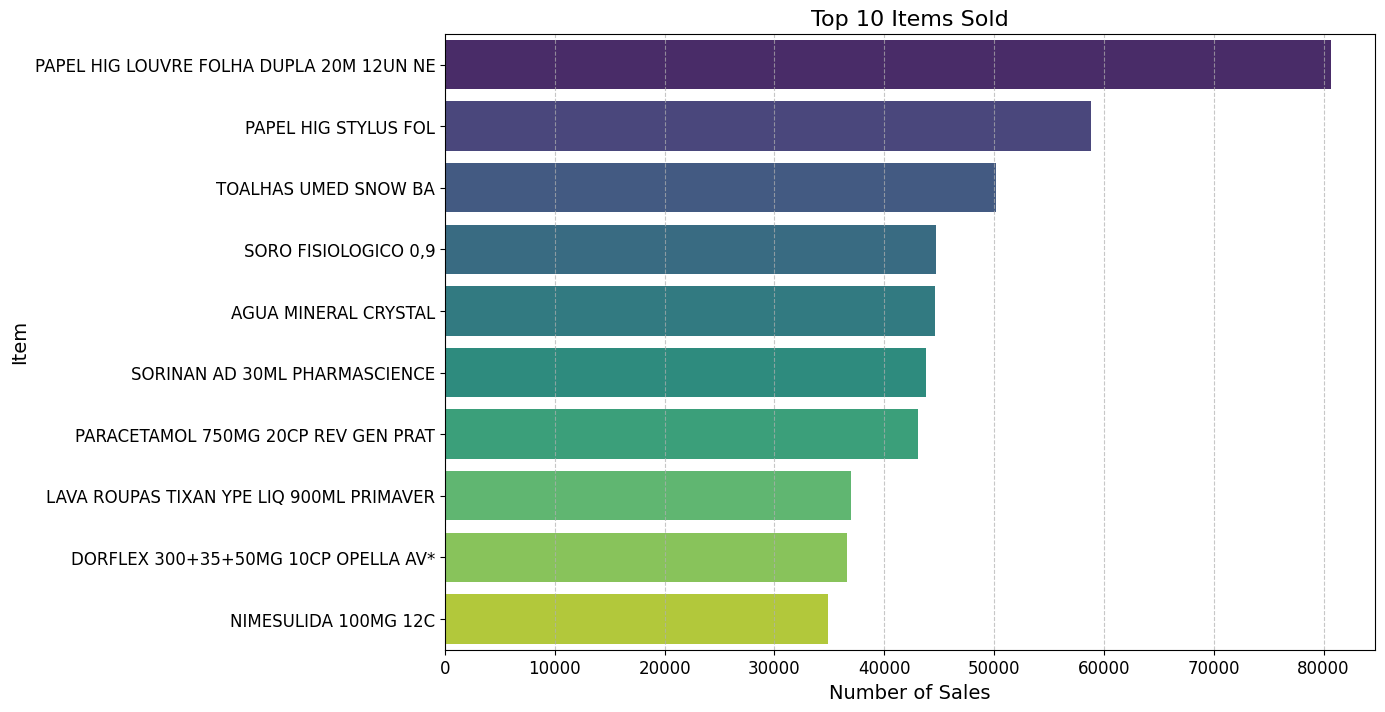

In [51]:
sku_counts = df['SKU'].value_counts().reset_index()
sku_counts.columns = ['SKU', 'Count']

# Filter to show only the top 10 items
top_sku_counts = sku_counts.head(10)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='SKU', data=top_sku_counts, palette='viridis', hue='SKU', dodge=False, legend=False)
plt.title('Top 10 Items Sold', fontsize=16)
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

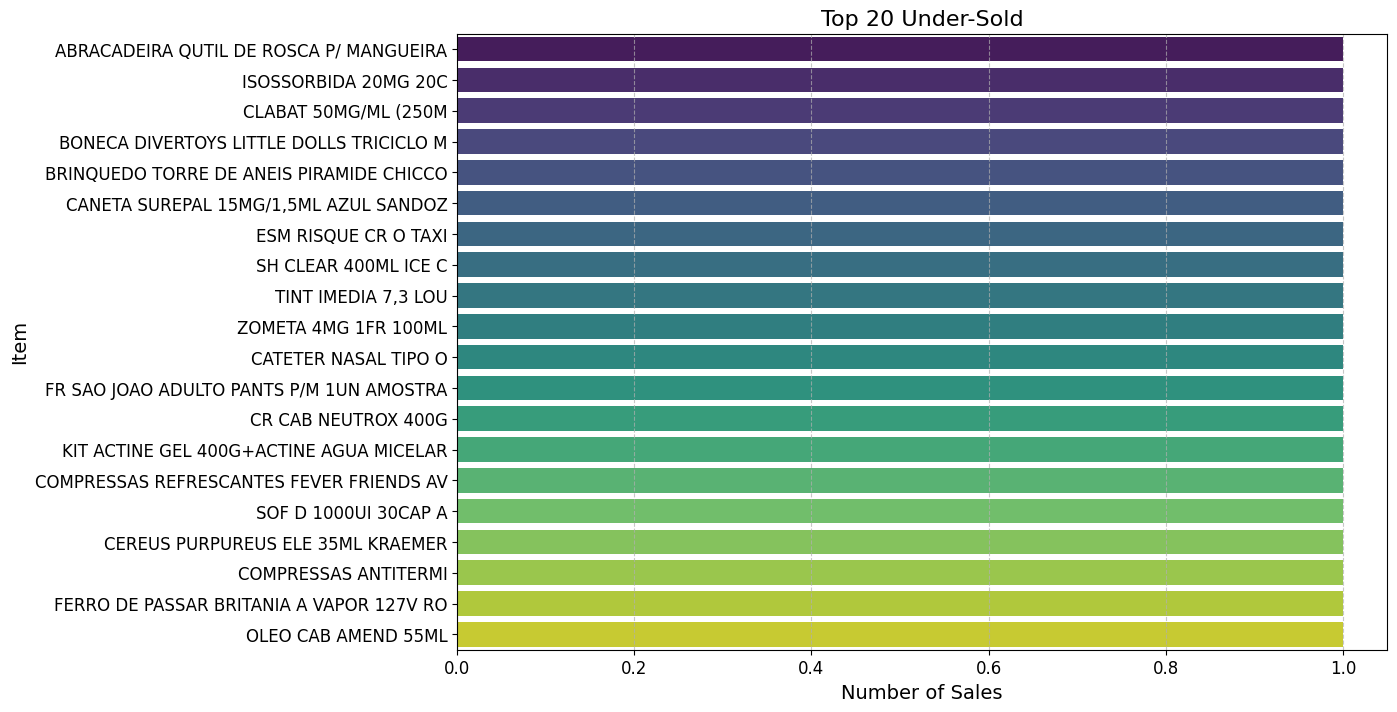

In [65]:
tail_sku_counts = sku_counts.tail(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='SKU', data=tail_sku_counts, palette='viridis', hue='SKU', dodge=False, legend=False)
plt.title('Top 20 Under-Sold', fontsize=16)
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [71]:
only_one_sale = sku_counts[sku_counts["Count"] == 1]
print(f'There are {only_one_sale.shape[0]} itens that were sold only once.')

There are 984 itens that were sold only once.
